In [71]:
import pandas as pd
import os
import re
import nlpcda as nc
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.spatial.distance import cosine
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np


from sklearn.metrics import classification_report,confusion_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import PreTrainedTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from tqdm import tqdm
import time
import math

In [5]:
cl = readcate_labels("./data/labels.csv")

def readcate_labels(filename):
    data = pd.read_csv(filename)
    return data





def txtpreprocess(txt, removenoncn=True, removetrim=True):
    res = txt
    res = re.sub("A.*B.*答案.*解析", "", res)
    res = re.sub("\(?本小题满分.*分\)?","",res)
    res = re.sub("\(?本小题共.*分\)?","",res)
    res = re.sub("答案.*解析","",res)
    res = re.sub("[,，、]+",",",res)
    res = re.sub("[….]+.*分","",res)

    res = re.sub(r'[^\u4e00-\u9fa5]', "", res)
    #print(res,len(res))
    return res.replace("\n", "").replace("\"", "").strip("\"")


def readexercisefiles(path):
    df = pd.DataFrame(columns=["exercise_text", 'labels'])
    for i in range(1373, 1394):
        predf_labels = cl[cl["cate"]==i]
        print(predf_labels)
        fn = path + str(i)
        if os.path.exists(fn):
            with open(fn) as f:
                ls = f.readlines()
                for l in ls:
                    exertext = txtpreprocess(
                        l)
                    if len(exertext)>10:
                        df = df.append({"exercise_text": exertext,
                                    "labels": predf_labels}, ignore_index=True)
    return df
def readdata(labelidx):
    fn = "./data/senior_Math" + str(labelidx)
    df = pd.DataFrame(columns=["exercise_text", 'labels'])

    predf_label = cl.iloc[labelidx-1373].at["labels"]
    if len(predf_label)==0:
        return df
    with open(fn) as f:
        ls = f.readlines()
        for l in ls:
            exertext = txtpreprocess(
                l)
            if len(exertext)>15:
                df = df.append({"exercise_text": exertext,
                            "labels": predf_label}, ignore_index=True)
    return df.drop_duplicates(subset=["exercise_text"], keep='first', inplace=False)

for i in [1375,1449,1450,1386,1377,1431,1400]:
    readdata(i).to_csv("./data/processed/"+str(i)+".csv",index = False)
        

NameError: name 'readcate_labels' is not defined

In [ ]:
with open("./data/processed/1450.csv") as f, open("./data/processed/1450_p.csv","w") as f2:
    ls = f.readlines()
    for l in ls:
        label = l.split(',')[1]
        newl = l[:-1]
        if re.search(r"(奇函数)+", l) or re.search(r"(偶函数)+", l) or re.search(r"(奇偶)+", l):
            if not re.search(r"(函数奇偶性)+", label):
                newl += "/函数奇偶性"
        if re.search(r"(正弦)+", l) or re.search(r"(余弦)+", l) or re.search(r"(三角函数)+", l):    
            if not re.search(r"(三角函数)+", label):
                newl += "/三角函数"
        if re.search(r"(命题)+", l) or re.search(r"(充分)+", l) or re.search(r"(必要)+", l) or re.search(r"(充要)+", l):    
            if not re.search(r"(逻辑与命题关系)+", label):
                newl += "/逻辑与命题关系"
        if re.search(r"(集合)+", l) or re.search(r"(并集)+", l) or re.search(r"(交集)+", l) or re.search(r"(子集)+", l) or re.search(r"(空集)+", l) or re.search(r"(韦恩图)+", l):     
            if not re.search(r"(集合)+", label):
                newl += "/集合"
        if re.search(r"(导数)+", l) or re.search(r"(切线)+", l) or re.search(r"(极值)+", l) or re.search(r"(单调递)+", l) or re.search(r"(单调区间)+", l) :    
            if not re.search(r"(导数)+", label):
                newl += "/导数"
        if re.search(r"(平面向量)+", l) or re.search(r"(向量)+", l) :    
            if not re.search(r"(平面向量)+", label):
                newl += "/平面向量"
        if re.search(r"(等差数列)+", l) :    
            if not re.search(r"(等差数列)+", label):
                newl += "/等差数列"
        if re.search(r"(等比数列)+", l) :    
            if not re.search(r"(等比数列)+", label):
                newl += "/等比数列"
        f2.write(newl+"\n")
            

In [ ]:
for i in [1375,1449,1386,1377,1431,1400]:
    with open("./data/processed/"+str(i) +".csv") as f, open("./data/processed/"+str(i)+ "_p.csv","w") as f2:
        ls = f.readlines()
        for l in ls:
            bool11 = re.search(r"(奇函数)+", l) or re.search(r"(偶函数)+", l) or re.search(r"(奇偶)+", l)
            bool12 = re.search(r"(函数奇偶性)+", label) 
            bool21 = re.search(r"(正弦)+", l) or re.search(r"(余弦)+", l) or re.search(r"(三角函数)+", l)
            bool22 = re.search(r"(三角函数)+", label)
            bool31 = re.search(r"(命题)+", l) or re.search(r"(充分)+", l) or re.search(r"(必要)+", l) or re.search(r"(充要)+", l)
            bool32 = re.search(r"(逻辑与命题关系)+", label)
            bool41 = re.search(r"(集合)+", l) or re.search(r"(并集)+", l) or re.search(r"(交集)+", l) or re.search(r"(子集)+", l) or re.search(r"(空集)+", l) or re.search(r"(韦恩图)+", l)
            bool42 = re.search(r"(集合)+", label)
            bool51 = re.search(r"(导数)+", l) or re.search(r"(切线)+", l) or re.search(r"(极值)+", l) or re.search(r"(单调递)+", l) or re.search(r"(单调区间)+", l)
            bool52 = re.search(r"(导数)+", label)
            bool61 = re.search(r"(平面向量)+", l) or re.search(r"(向量)+", l)
            bool62 = re.search(r"(平面向量)+", label)
            bool71 = re.search(r"(数列)+", l)
            bool72 =  re.search(r"(数列)+", label)
            label = l.split(',')[1]
            newl = l[:-1]
            if bool11 and not bool12:
                newl += "/函数奇偶性"
            if bool21 and not bool22:    
                newl += "/三角函数"
            if bool31 and not bool32:    
                newl += "/逻辑与命题关系"
            if bool41 and not bool42:
                newl += "/集合"
            if bool51 and not bool52:
                newl += "/导数"
            if bool61 and not bool62:
                newl += "/平面向量"
            if bool71 and not bool72:
                newl += "/数列"
            f2.write(newl+"\n")


In [ ]:
dflst = []
for i in [1375, 1449,1386,1377,1431,1400]:
    dflst.append(pd.read_csv("./data/processed/"+str(i)+ "_p.csv"))
tl = pd.concat(dflst)
dflst


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_result = mlb.fit_transform(
    [str(tl.loc[i, 'labels']).split('/') for i in range(len(tl))])

In [ ]:
mlb_result

In [ ]:
df_final = pd.concat([tl['exercise_text'], pd.DataFrame(
    mlb_result, columns=list(mlb.classes_))], axis=1)

In [ ]:
df_final = df_final.drop_duplicates(subset=["exercise_text"], keep='first', inplace=False)

In [ ]:
df_final.shuffle()

In [49]:
df_train = pd.read_csv("./data/train.csv")
df_test=  pd.read_csv("./data/test.csv")

In [10]:
df_final = pd.concat([df_train,df_test], ignore_index=True)

In [12]:
cols_target = df_train.columns[1:].tolist()
cols_target

['三角函数', '函数奇偶性', '导数', '平面向量', '数列', '逻辑与命题关系', '集合']

In [30]:
df_final["n_cate"] = sum([df_final[cate] for cate in cols_target]).astype("int32")

In [ ]:
sns.set_style('whitegrid',{'font.sans-serif':['STXihei','Arial']})

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})

train_df_corr= df_train[cols_target].corr()
mask = np.triu(np.ones_like(train_df_corr, dtype=np.bool))
plt.figure(figsize=(12,8), dpi=400)

heatmap = sns.heatmap(train_df_corr,mask=mask, linewidths=0.1, vmin=0, vmax=1,cmap='BrBG',annot=True,square=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_cate', ylabel='n_cate'>

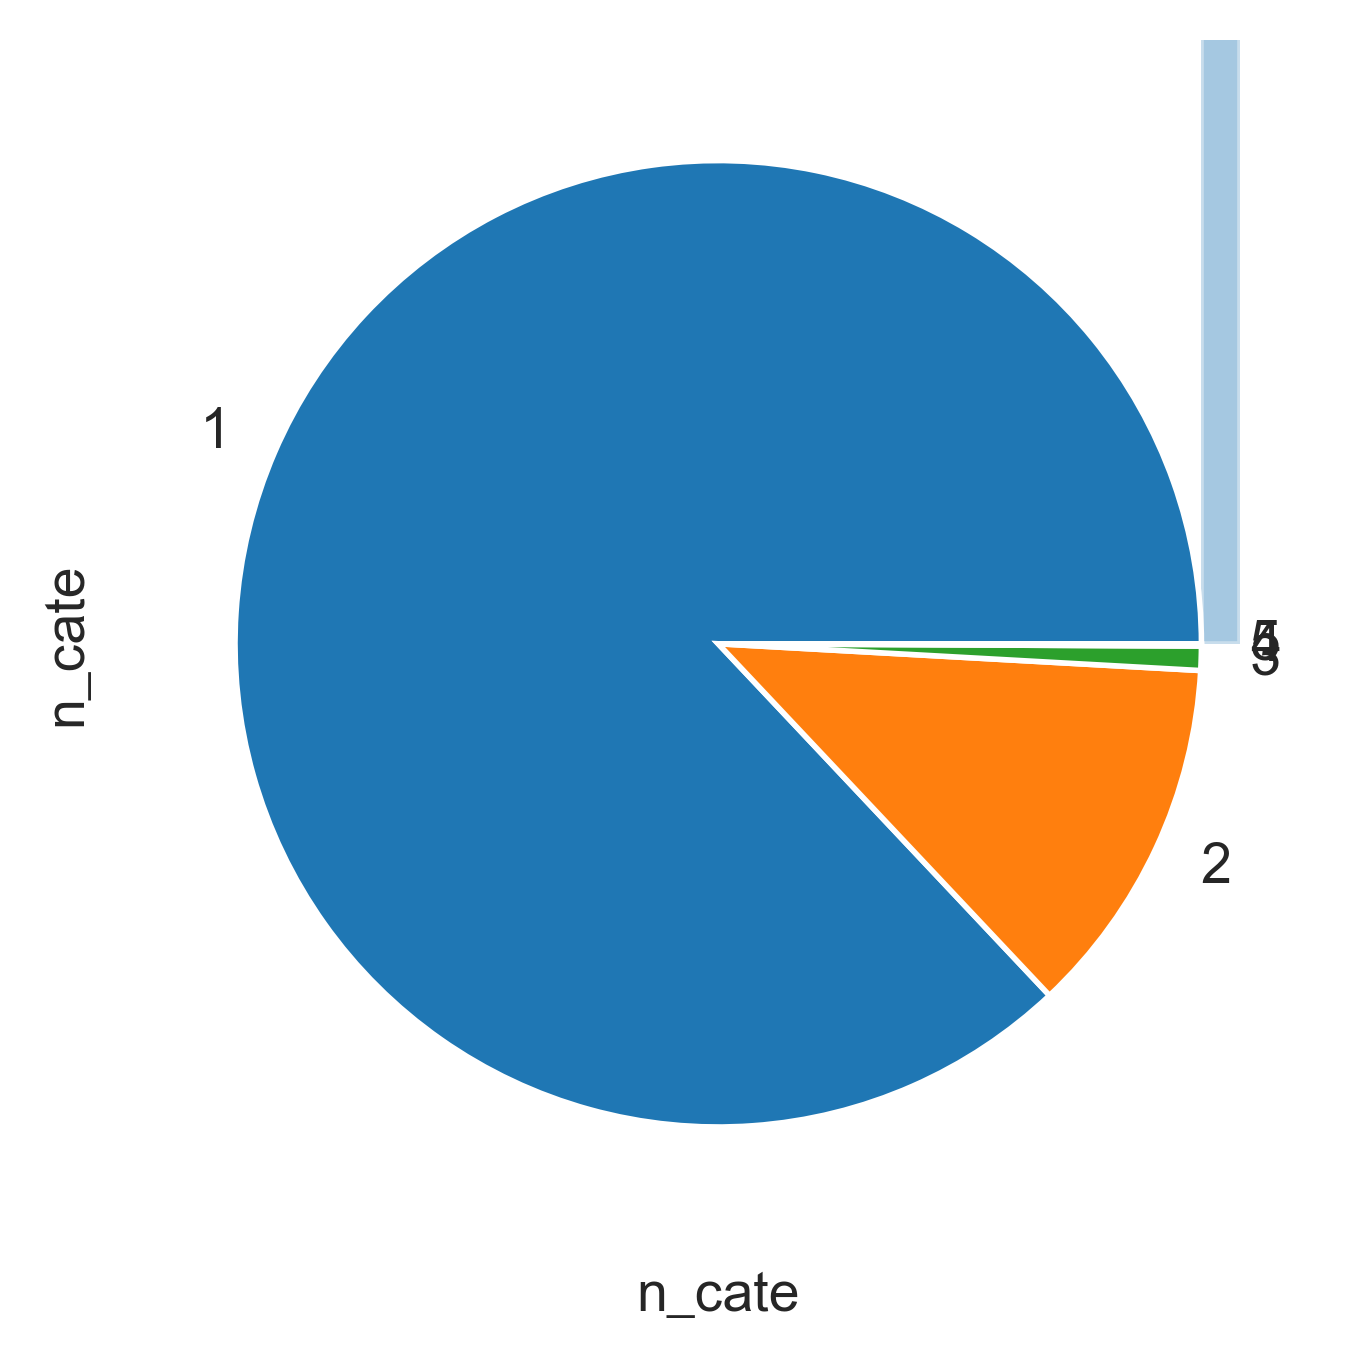

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=400)
plt.xticks([1,2,3,4])

sns.distplot(df_final['n_cate'], bins=None, hist=True, kde=False, rug=False, 
             fit=None,color=None, axlabel=None, ax=None)

df_final['n_cate'].value_counts().plot.pie()

In [ ]:
# df_train.to_csv("./data/train.csv",index=False)
# df_test.to_csv("./data/test.csv",index=False)

In [8]:
cols_target = df_train.columns[1:].tolist()
cols_target

['三角函数', '函数奇偶性', '导数', '平面向量', '数列', '逻辑与命题关系', '集合']

In [50]:
train_df_corr= df_train[cols_target].corr()

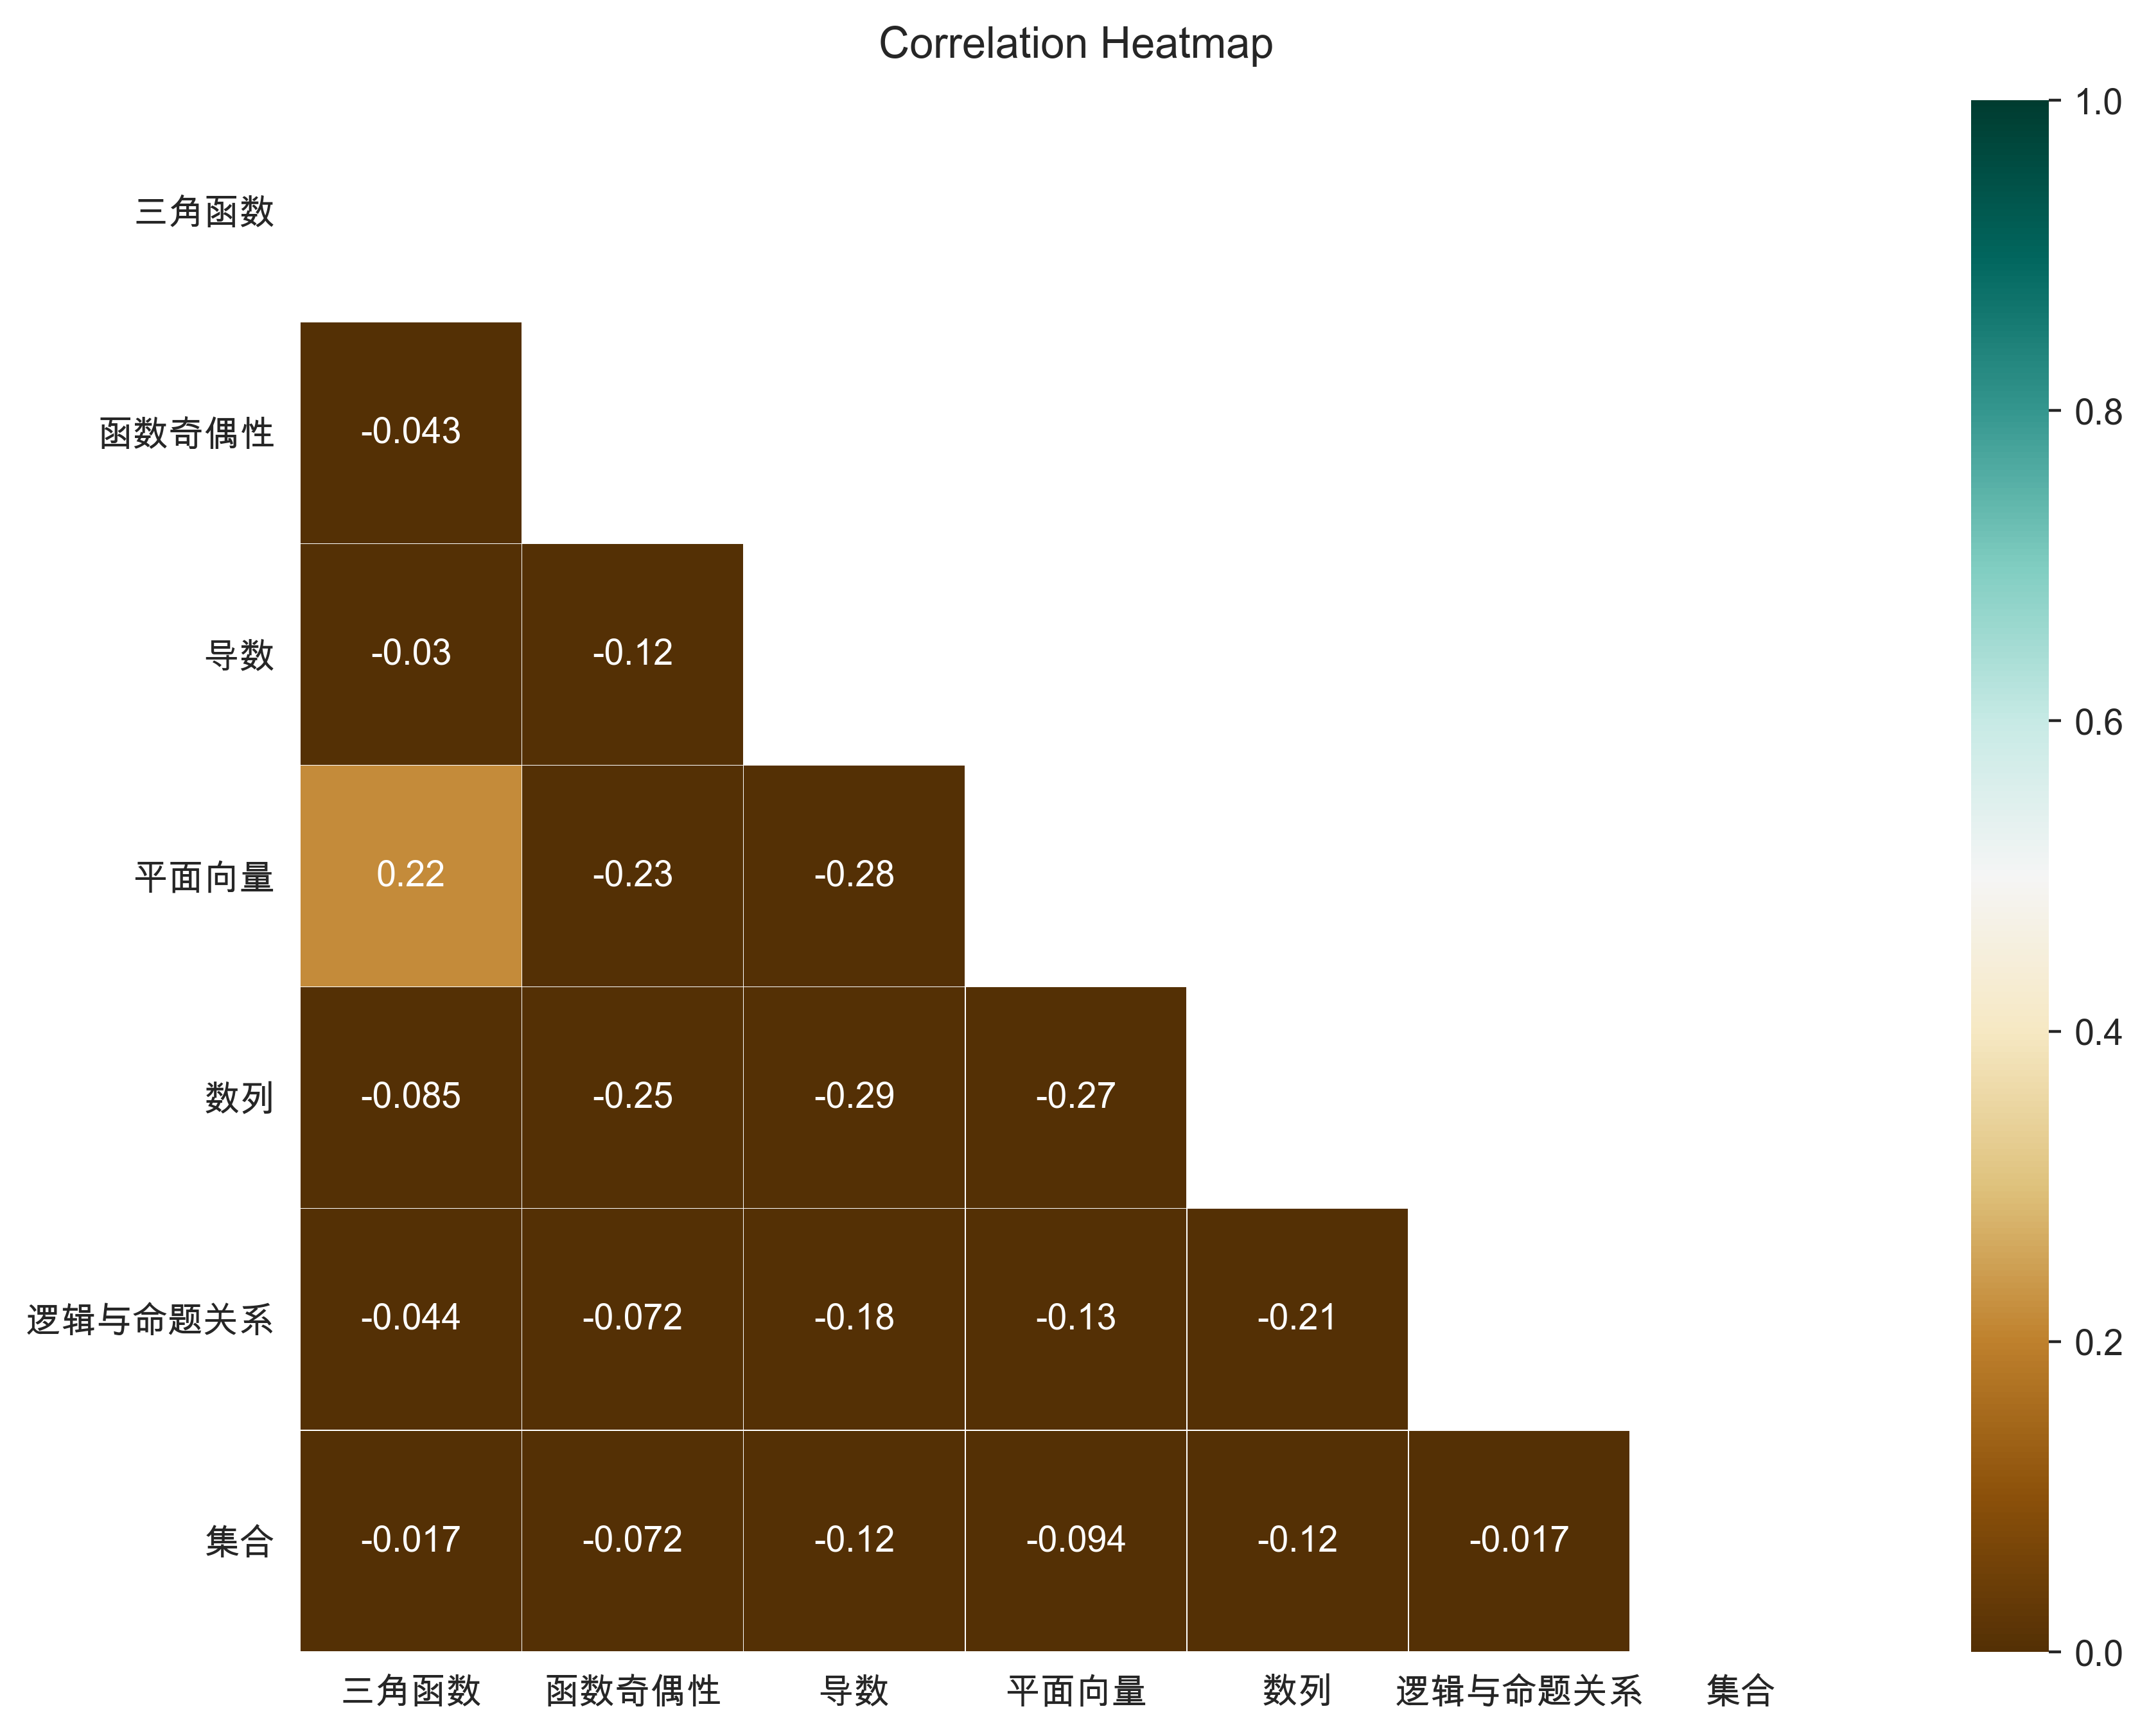

In [ ]:
print('Total rows in test is {}'.format(len(df_train)))
print('Total rows in train is {}'.format(len(df_test)))
print(df_train[cols_target].sum())

In [58]:
from transformers import PreTrainedTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
tokenizer = PreTrainedTokenizerFast.from_pretrained('hfl/chinese-bert-wwm')
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
def prepare_set(dataset, max_length=64):
    """returns input_ids, input_masks, labels for set of data ready in BERT format"""
    global tokenizer
    
    input_ids = dataset
#     for i in tqdm(dataset):
#         input_ids.append(camel_case_split(i))
    tokenized = tokenizer.batch_encode_plus(input_ids,return_token_type_ids=False, return_attention_mask=False, pad_to_max_length=True,truncation=True, max_length=max_length)["input_ids"]
    return tokenized

In [60]:
max_length = 128
hidden_size= 64
batch_size = 32
n_epochs = 5
embed_size = 64
lr = 0.001
model_path = "BiLSTM_attention_BiRel.pt"
use_gpu = True
dev_size = int(df_train.shape[0] * 0.10)

In [44]:
device =  torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
device

device(type='cpu')

In [47]:
labelemb

/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2068: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


[[101,
  676,
  6235,
  1141,
  3144,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  1141,
  3144,
  1936,
  981,
  2595,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  2193,
  3144,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [110]:
labelemb = prepare_set(cols_target)
num_classes = len(cols_target)
adj = torch.Tensor(np.identity(num_classes))

class GraphConvolution(nn.Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, bias=False):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.Tensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.Tensor(1, 1, out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
        self.fc = nn.Linear(in_features, )
        
    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.matmul(input, self.weight)
        
        output = torch.matmul(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
            + str(self.in_features) + ' -> ' \
            + str(self.out_features) + ')'


class Attention(nn.Module):
    """a Single Attention Layer"""
    def __init__(self, feature_dim):
        super(Attention, self).__init__()
        
        self.supports_masking = True
        self.feature_dim = feature_dim
        weight = torch.zeros(feature_dim, 1)
        nn.init.xavier_uniform_(weight)
        self.weight = nn.Parameter(weight)
    
    def forward(self, x, step_dim, mask=None):
        feature_dim = self.feature_dim
        eij = torch.mm(
            x.contiguous().view(-1, feature_dim), self.weight
        ).view(-1, step_dim)
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        if mask is not None:
            a = a * mask
        a = a / torch.sum(a, 1, keepdim=True) + 1e-10
        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1), torch.unsqueeze(a, -1)




class BiLSTMWithAttention(nn.Module):
    """the BiLSTM model refer to the image above to understand the structure of the model"""
    def __init__(self,hidden_size,embed_size,max_features,num_classes,max_length):
        super().__init__()
        self.embedding = nn.Embedding(max_features, embed_size)
        self.lstm1 = nn.LSTM(embed_size, hidden_size, bidirectional=True, batch_first=True)
        
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, bidirectional=True, batch_first=True)
        
        self.lstm_attention = Attention(hidden_size * 2)
        
        self.linear1 = nn.Linear(hidden_size*6, hidden_size*6)
        self.linear2 = nn.Linear(hidden_size*6, hidden_size*6)
        
        self.linear_out = nn.Linear(hidden_size*6, 1)
        self.linear_aux_out = nn.Linear(hidden_size*6, num_classes)
        
        
        
    def forward(self, x, step_len):
        h_embedding = self.embedding(x)
        h_lstm1, _ = self.lstm1(h_embedding)
        h_lstm2, _ = self.lstm2(h_lstm1)
        #Attention layer
        h_lstm_atten, weights = self.lstm_attention(h_lstm2, max_length)
        # global average pooling
        avg_pool = torch.mean(h_lstm2, 1)
        # global max pooling
        max_pool, _ = torch.max(h_lstm2, 1)
        h_conc = torch.cat((h_lstm_atten, max_pool, avg_pool), 1)
        h_conc_linear1 = F.relu(self.linear1(h_conc))
        h_conc_linear2 = F.relu(self.linear2(h_conc))
        
        hidden = h_conc + h_conc_linear1 + h_conc_linear2
        
        
        result = self.linear_out(hidden)
        aux_result = self.linear_aux_out(hidden)
        
#         out = torch.cat([result, aux_result], 1)
#         print(f"out : {out.shape}")
#         return out, weights
        return aux_result, weights


class Model(nn.Module):
    """the BiLSTM model refer to the image above to understand the structure of the model"""
    def __init__(self,hidden_size,embed_size,max_features,num_classes,max_length,emb_labels):
        super().__init__()
        self.embedding = nn.Embedding(max_features, embed_size)
        self.lstm1 = nn.LSTM(embed_size, hidden_size, bidirectional=True, batch_first=True)
        
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, bidirectional=True, batch_first=True)
        
        self.lstm_attention = Attention(hidden_size * 2)
        
        self.linear1 = nn.Linear(hidden_size*6, hidden_size*6)
        self.linear2 = nn.Linear(hidden_size*6, hidden_size*6)
        
        self.linear_out = nn.Linear(hidden_size*6, 1)
        self.emb_labels = emb_labels # num_class * emb_size
        self.graph = GraphConvolution(embed_size,hidden_size*6)
        
        
    def forward(self, x, step_len, adj):
        '''
        
        
        '''
        h_embedding = self.embedding(x)
        h_lstm1, _ = self.lstm1(h_embedding)
        h_lstm2, _ = self.lstm2(h_lstm1)
        #Attention layer
        h_lstm_atten, weights = self.lstm_attention(h_lstm2, max_length)
        # global average pooling
        avg_pool = torch.mean(h_lstm2, 1)
        # global max pooling
        max_pool, _ = torch.max(h_lstm2, 1)
        h_conc = torch.cat((h_lstm_atten, max_pool, avg_pool), 1)
        h_conc_linear1 = F.relu(self.linear1(h_conc))
        h_conc_linear2 = F.relu(self.linear2(h_conc))
        
        hidden = h_conc + h_conc_linear1 + h_conc_linear2
        label_rep = self.graph(self.emb_labels, adj) # num_class * hidden_size*6
        
        aux_result = 
        
        #result = self.linear_out(hidden) 
        #aux_result = self.linear_aux_out(hidden)
#         out = torch.cat([result, aux_result], 1)
#         print(f"out : {out.shape}")
#         return out, weights
        return aux_result, weights


SyntaxError: invalid syntax (<ipython-input-110-e581de30ec6b>, line 155)

In [86]:
input = torch.randn(2)
input

tensor([-1.1933,  0.5844])

In [53]:
torch.Tensor(np.identity(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [98]:
def train_model(models, loss_fn, lr=0.001, batch_size=32, n_epochs=10,max_length=64):
    for col in cols_target:
        models[col]['param_lrs'] = [{'params': param, 'lr': lr} for param in models[col]['model'].parameters()]
        models[col]['optimizer'] = torch.optim.Adam(models[col]['param_lrs'], lr=lr)
        models[col]['training_loss'] = []
        models[col]['validation_loss'] = []

    
    
    for model_index,target_label in enumerate(cols_target):
        print("="*50)
        print(f"training {target_label} model....")
        models[target_label]['model'].to(device)
        
        best_loss = float("inf")
        
        for epoch in range(n_epochs):
            start_time = time.time()

            models[target_label]['model'].train()
            avg_loss = 0

            for data in tqdm(train_dataloader, disable=False):
                x_batch = data[:-1]
                y_batch = data[-1][:,model_index].unsqueeze(1)

                y_pred, _ = models[target_label]['model'](*x_batch, max_length)
                
                loss = nn.BCEWithLogitsLoss()(y_pred,y_batch)
                models[target_label]['optimizer'].zero_grad()
                loss.backward()
                models[target_label]['optimizer'].step()
                avg_loss += loss.item() / len(train_dataloader)

            models[target_label]['training_loss'].append(avg_loss)
            models[target_label]['model'].eval()
            
            print(f'... Validating ... ')
            
            avg_val_loss = 0
            
            for val_data in tqdm(dev_dataloader, disable=False):
                x_batch = val_data[:-1]
                y_batch = val_data[-1][:,model_index].unsqueeze(1)

                y_pred, _ = models[target_label]['model'](*x_batch, max_length)

                val_loss = nn.BCEWithLogitsLoss()(y_pred, y_batch)
                avg_val_loss += val_loss.item() / len(dev_dataloader)

            elapsed_time = time.time() - start_time
            models[target_label]['validation_loss'].append(avg_val_loss)
            
            if avg_val_loss < best_loss:
                print('saving the best model so far')
                best_loss = avg_val_loss
                torch.save(models[target_label]['model'].state_dict(), target_label+'_model.pt')
            print(f'Epoch {epoch + 1}/{n_epochs}\t training_loss={avg_loss:.4f} \t validation_loss={avg_val_loss: 4f} \t time={elapsed_time:.2f}s')
    
    models.clear()
    
    models = {
        '三角函数':{},
        '函数奇偶性':{},
        '导数':{},
        '平面向量':{},
        '数列':{},
        '逻辑与命题关系':{},
        '集合':{}
    }
    
    
    print("loading best models .... ")
    for target_label in cols_target:
        # load each best model into its corresponding dict key
        models[target_label]['model'] = BiLSTMWithAttention(hidden_size=hidden_size,
                        embed_size=embed_size,
                        max_features=tokenizer.vocab_size,
                        num_classes=1,
                        max_length=max_length)
        models[target_label]['model'].load_state_dict(torch.load(target_label+'_model.pt'))
        os.remove(target_label+'_model.pt')
    
    print("saving best models into a single file .... ")
    # saving all models in a single model file
    torch.save({
            '三角函数': models['三角函数']['model'].state_dict(),
            '函数奇偶性': models['函数奇偶性']['model'].state_dict(),
            '导数': models['导数']['model'].state_dict(),
            '平面向量': models['平面向量']['model'].state_dict(),
            '数列': models['数列']['model'].state_dict(),
            '逻辑与命题关系': models['逻辑与命题关系']['model'].state_dict(),
            '集合': models['集合']['model'].state_dict(),
            }, model_path)
def evaluate(models):
    for model_index,target_label in enumerate(cols_target):
        
        print("="*40)
        print(f"evaluating {target_label} model .... ")
        
        y_preds = []
        y_trues = []
        
        models[col]['model'].eval()
        with torch.no_grad():
            for tst_data in tqdm(test_dataloader, disable=False):
                x_batch = tst_data[:-1]
                y_batch_labels = tst_data[-1][:,model_index].detach().cpu().numpy()

                y_pred, _ = models[col]['model'](*x_batch, max_length)

                y_pred_labels = (torch.sigmoid(y_pred).detach().cpu().numpy() > 0.5)

                y_preds.extend(y_pred_labels.squeeze(1))
                y_trues.extend(y_batch_labels)
        
        print(confusion_matrix(y_true=y_trues,y_pred=y_preds))
        print(classification_report(y_trues,y_preds))
    

In [105]:
#bilstm+att
models = {
    '三角函数':{},
    '函数奇偶性':{},
    '导数':{},
    '平面向量':{},
    '数列':{},
    '逻辑与命题关系':{},
    '集合':{}
}
for col in cols_target:
    models[col]['model'] = BiLSTMWithAttention(hidden_size=hidden_size,
                            embed_size=embed_size,
                            max_features=tokenizer.vocab_size,
                            num_classes=1,
                            max_length=max_length)

In [106]:
models

{'三角函数': {'model': BiLSTMWithAttention(
    (embedding): Embedding(21128, 64)
    (lstm1): LSTM(64, 64, batch_first=True, bidirectional=True)
    (lstm2): LSTM(128, 64, batch_first=True, bidirectional=True)
    (lstm_attention): Attention()
    (linear1): Linear(in_features=384, out_features=384, bias=True)
    (linear2): Linear(in_features=384, out_features=384, bias=True)
    (linear_out): Linear(in_features=384, out_features=1, bias=True)
    (linear_aux_out): Linear(in_features=384, out_features=1, bias=True)
  )},
 '函数奇偶性': {'model': BiLSTMWithAttention(
    (embedding): Embedding(21128, 64)
    (lstm1): LSTM(64, 64, batch_first=True, bidirectional=True)
    (lstm2): LSTM(128, 64, batch_first=True, bidirectional=True)
    (lstm_attention): Attention()
    (linear1): Linear(in_features=384, out_features=384, bias=True)
    (linear2): Linear(in_features=384, out_features=384, bias=True)
    (linear_out): Linear(in_features=384, out_features=1, bias=True)
    (linear_aux_out): Linear

In [89]:
train_df_cpy = df_train[dev_size:]
dev_df_cpy = df_train[:dev_size]
test_df_cpy = df_test
print("preprocessing training data...")
X_train = prepare_set(train_df_cpy['exercise_text'].values.tolist())
#y_true_cpy = y_true
print("preprocessing training data...")
X_dev = prepare_set(dev_df_cpy['exercise_text'].values.tolist())
X_test = prepare_set(df_test['exercise_text'].values.tolist())

preprocessing training data...
preprocessing training data...


In [92]:
x_train_torch = torch.tensor(X_train, dtype=torch.long).to(device)
x_dev_torch = torch.tensor(X_dev, dtype=torch.long).to(device)
x_test_torch = torch.tensor(X_test, dtype=torch.long).to(device)
y_train = train_df_cpy[cols_target].values
y_dev = dev_df_cpy[cols_target].values
y_test = df_test[cols_target].values
y_train_torch = torch.tensor(y_train,dtype=torch.float).to(device)
y_dev_torch = torch.tensor(y_dev, dtype=torch.float).to(device)
y_test_torch = torch.tensor(y_test,dtype=torch.float).to(device)

In [94]:
# Create the DataLoader for training set
train_data = TensorDataset(x_train_torch, y_train_torch)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [95]:
# Create the DataLoader for dev set.
test_data = TensorDataset(x_test_torch, y_test_torch)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [97]:
# Create the DataLoader for dev set
dev_data = TensorDataset(x_dev_torch, y_dev_torch)
dev_sampler = RandomSampler(dev_data)
dev_dataloader = DataLoader(dev_data, sampler=dev_sampler, batch_size=batch_size)

In [ ]:
for col in cols_target:
    models[col]['model'] = BiLSTMWithAttention(hidden_size=hidden_size,
                            embed_size=embed_size,
                            max_features=tokenizer.vocab_size,
                            num_classes=1,
                            max_length=max_length)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import PreTrainedTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import numpy as np
import pandas as pd
import re
import os
from tqdm import tqdm
import time
import math
from sklearn.metrics import classification_report,confusion_matrix

train_model(models=models,loss_fn=None,lr=lr,batch_size=batch_size,n_epochs=n_epochs,max_length=max_length)

In [ ]:
models_single_file = torch.load(model_path)


In [ ]:
for col in cols_target:
    models[col]['model'].load_state_dict(models_single_file[col])
    models[col]['model'].to(device)

In [103]:
a = torch.randn(3,10)
b = torch.Tensor(np.identity(3))
b,a

(tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
 tensor([[-0.8427, -0.2816,  1.0742,  0.1990, -0.6961,  0.9295,  0.3975,  0.7761,
           0.3174, -0.1527],
         [-0.0952, -0.9180, -1.1148,  0.3343,  0.4388,  2.4599,  1.4910, -0.5650,
          -1.7099,  2.4985],
         [-0.3585, -0.2573,  0.2354,  1.4052,  1.2870, -3.2054,  0.3738,  2.3168,
           0.8394,  1.1483]]))

In [104]:
torch.matmul(b,a)

tensor([[-0.8427, -0.2816,  1.0742,  0.1990, -0.6961,  0.9295,  0.3975,  0.7761,
          0.3174, -0.1527],
        [-0.0952, -0.9180, -1.1148,  0.3343,  0.4388,  2.4599,  1.4910, -0.5650,
         -1.7099,  2.4985],
        [-0.3585, -0.2573,  0.2354,  1.4052,  1.2870, -3.2054,  0.3738,  2.3168,
          0.8394,  1.1483]])

In [111]:
tensor_1= torch.randn(2,3)
tensor_2= torch.randn(4,3)

tensor_1,tensor_2

(tensor([[ 0.6567, -1.5522, -1.2392],
         [ 2.1272,  0.3953, -0.6968]]),
 tensor([[-0.1415, -0.1994, -0.3797],
         [-1.8433,  0.1964,  0.7303],
         [ 1.1837,  1.2336,  0.5186],
         [ 0.1446, -0.0711,  1.4960]]))

In [113]:
normalized_tensor_1 = tensor_1 / tensor_1.norm(dim=-1, keepdim=True)
normalized_tensor_2 = tensor_2 / tensor_2.norm(dim=-1, keepdim=True)
normalized_tensor_1, normalized_tensor_2

(tensor([[ 0.3139, -0.7420, -0.5924],
         [ 0.9358,  0.1739, -0.3066]]),
 tensor([[-0.3133, -0.4415, -0.8408],
         [-0.9252,  0.0986,  0.3665],
         [ 0.6626,  0.6905,  0.2903],
         [ 0.0961, -0.0473,  0.9942]]))

In [134]:
torch.matmul(normalized_tensor_1,normalized_tensor_2.transpose(0,1))


tensor([[ 0.7273, -0.5807, -0.4762, -0.5237],
        [-0.1122, -0.9610,  0.6511, -0.2230]])

In [137]:
(normalized_tensor_1[0]*normalized_tensor_2[1]).sum(dim=-1)

tensor(-0.5807)

In [118]:
hg1 = torch.FloatTensor(torch.randn([3,12]))
hg2 = torch.FloatTensor(torch.randn([4,12]))
torch.matmul(hg1,hg2)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x12 and 4x12)

In [119]:
on1 = torch.ones(2,3)

In [124]:
on2 = torch.randn(4,3)

In [132]:
on1*on2

tensor([0., 2., 4.])

In [123]:
on2

tensor([[ 1.1432e-03,  9.7418e-01,  3.3939e-01],
        [-2.5433e-01,  8.9024e-01,  9.8946e-01],
        [-1.9214e+00, -8.4029e-01, -1.2431e+00]])

In [ ]:
on